## Introduction: miniMD
This is a brief introduction to the lightweight package miniMD2 which can be used to investigate the porperties of different numerical schemes. Currently the only dependency is numpy (this might change in the future). The package runs both in python 3 and python 3 (version 2.7 tested). However,  we recommend using python 3. 

First we begin by importing numpy and pyplot to be able to plot the output. Press SHIFT+RETURN to execute the code below

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The miniMD package consists of three small python clases model, integrator, and outputsheduler. 
- The model class: Defines the force field. The force field is assumed to be the gradient of a potential function.
- The integrator class: Holds the values of the phase space variables and evolves them in time.
- The outputsheduler class: Handles the output of the simulation. 

The workflow consisits of first initialising the model, then specifying the integrator and attaching an outputsheduler to the latter. The integrator then provides access to the "run" function which evolves the trajectory for a number of time steps specified in the outputsheduler. In what follows we demontrate the basic work flow in the case of a simple one dimensional Harmonic Oscillator, i.e., we consider a Hamiltonian system of the form 
$$ H(q,p) = U(q)+\frac{1}{2} p^2,$$
whith $U(q) = \frac{k}{2} q^2$, where $k>0$ is referred to as the stiffness coeffcient of the harmonic spring. We want to evolve the system for a physical time of $T=20$.


Fist, import the modules with the following commands:

In [2]:
# import mini MD modules
from miniMD import models
from miniMD import integrators
from miniMD import outputshedulers as outp

Next, we can define our model, a 1-dimensional Harmonic oscillator with stiffness constant $k=1$:

In [3]:
model = models.HarmonicOscillator()

If you would like to create a model implementing 4 independent Harmonic oscillators each of them having stiffness constant valued $k=3.0$, you can do this by providing the arguments `dim=4` and `k=3.0` in the constructor.

In [4]:
model = models.HarmonicOscillator(dim=4,k=3.0)

In the second step we define the integrator:

In [5]:
integrator = integrators.EulerHamDyn(model, h=.1)

The integrator `EulerHamDyn` implements the standard Euler scheme applied to Hamilton's equation, i.e., one step using a stepsize $h$ is of the form 
$$
\begin{aligned}
q_{n+1} &= q_n + h p_n, \\ p_{n+1} &= p_n -h\nabla U (q_n).
\end{aligned}
$$

You may take a look at the implementation of this scheme in the file ./miniMD/integrators.py.  
#### Remark: As you will find out later in this tutorial the standard Euler scheme is not a good choice in this context.

Finally, we define an outputsheduler:

In [6]:
op = outp.BufferedOutputsheduler(integrator, 
                                 Nsteps=int(20.0/integrator.h), 
                                 varname_list=['q','p'], 
                                 modprnt=1)

The argument `Nsteps` speficies the total number of time steps for which the integrator is run when called by the function `run`. 
The argument `varname_list` specifies the variables which are monitored when the integrator is run. Upon initialisation a variable `op.traj_` preceded by the name of the monitored variable is created as an argument of the outputsheduler. When the function integrator.run() is called the values of the monitored variables are written into the respective trajectory variable with  at a frequency specified by the argument `modprnt`, i.e., given the above specifications, the values of `integrator.position` and `integrator.momentum` are written at every time step into the variables `op.traj_position` and `op.traj_momentum` when the function `integrator.run` is called. 

In order to run the integrator call the function specify the initial values for the relevant phase space variables in dicitionary format and provide this as an argument when calling the function `integrator.run`:

In [7]:
dim=model.dim
initial_values ={'p': np.ones(dim), 'q': np.zeros(dim)}
integrator.run(initial_values=initial_values)

As mentioned after the function `integrator.run` has been called, we can easily access the trajectory monitored variables and compute statistics or simply just plot it:

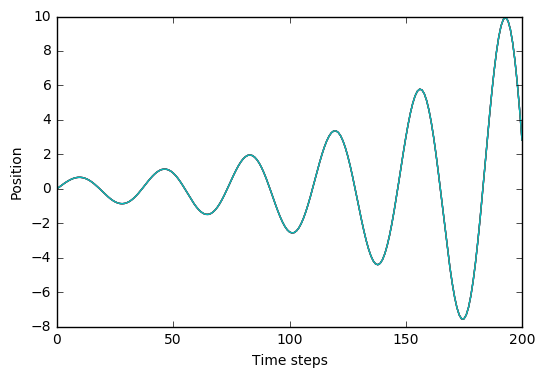

In [8]:
fig,ax = plt.subplots()
ax.plot(op.traj_q)
ax.set_xlabel('Time steps')
ax.set_ylabel('Position')
plt.show()